# k-Nearest Neighbor (KNN)
*****
- Ejemplo del algoritmo KNN aplicado en el dataset diabetes.csv

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Problema
*****
- El dataset es original de *National Institute of Diabetes and Digestive and Kidney Diseases*. 
- El problema es clasificar si el paciente tiene o no tiene diabetes, basado en variables de mediciones médicas del paciente.
-  Todas los datos son de pacientes del género femenino, mayores de 21 años.

# Datos:
*****
- Datos públicos, disponibles en [Kaggle](https://www.kaggle.com/saurabh00007/diabetescsv) 

In [2]:
df = pd.read_csv("../../../data/diabetes.csv")
df.head()
print(df.shape)

(768, 9)


# Verificar distribución de clases

In [3]:
values = df["Outcome"].value_counts()

In [4]:
values

0    500
1    268
Name: Outcome, dtype: int64

Text(1.28, 300, '0.35%')

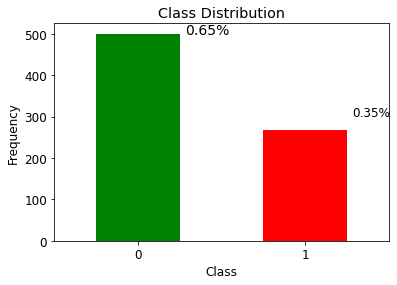

In [5]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)

pd.value_counts(df["Outcome"]).plot.bar(rot=0, color=["green", "red"])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.text(0.28, 500,str(round(values[0]/(values[0]+values[1]),2)) + "%", fontsize=14)
plt.text(1.28, 300,  str(round(values[1]/(values[0]+values[1]),2)) + "%", fontsize=12)


## X matrix (features)

In [6]:
# Data features
X = df.drop(columns=["Outcome"])
#check that the target variable has been removed
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# y vector (labels)

In [7]:
#separate target values
y = df["Outcome"].values
#view target values
y[0:5]

array([1, 0, 1, 0, 1])

# Scaling data, and training and testing sets

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_data,y, test_size=0.2, random_state=0)


# k-Nearest Neighbor

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn.predict(X_test)

In [11]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

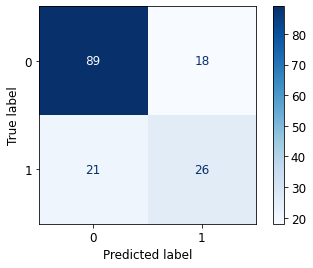

In [12]:
plot_confusion_matrix(knn, X_test, y_test, cmap = plt.cm.Blues)

In [13]:
from sklearn.metrics import classification_report
import pandas as pd
d = classification_report(y_test, y_pred,output_dict=True)
display(pd.DataFrame(d))

,0,1,accuracy,macro avg,weighted avg
precision,0.809091,0.590909,0.746753,0.700000,0.742503
recall,0.831776,0.553191,0.746753,0.692484,0.746753
f1-score,0.820276,0.571429,0.746753,0.695853,0.744329
support,107.000000,47.000000,0.746753,154.000000,154.000000


# GridSearchCV KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 25), "weights": ["uniform", "distance"],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
scoring = ['accuracy','f1', "precision", "recall"]
knn_grid = GridSearchCV(knn2, param_grid, cv=5, n_jobs=-1, scoring=scoring, refit="f1")
knn_grid.fit(X_train, y_train)

In [17]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}

In [18]:
knn_grid.best_score_

0.5907091468612896

In [19]:
y_pred_2 = knn_grid.best_estimator_.predict(X_test)

In [20]:
y_pred_2

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

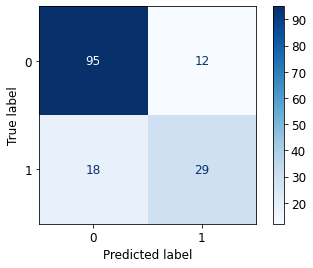

In [21]:
plot_confusion_matrix(knn_grid.best_estimator_, X_test, y_test, cmap = plt.cm.Blues)

In [22]:
d2 = classification_report(y_test, y_pred_2,output_dict=True)
display(pd.DataFrame(d2))

,0,1,accuracy,macro avg,weighted avg
precision,0.840708,0.707317,0.805195,0.774013,0.799998
recall,0.887850,0.617021,0.805195,0.752436,0.805195
f1-score,0.863636,0.659091,0.805195,0.761364,0.801210
support,107.000000,47.000000,0.805195,154.000000,154.000000


In [23]:
display(pd.DataFrame(d))

,0,1,accuracy,macro avg,weighted avg
precision,0.809091,0.590909,0.746753,0.700000,0.742503
recall,0.831776,0.553191,0.746753,0.692484,0.746753
f1-score,0.820276,0.571429,0.746753,0.695853,0.744329
support,107.000000,47.000000,0.746753,154.000000,154.000000
